In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import requests

!pip install ipython-sql


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.2 MB/s eta 0:00:00


In [ ]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"


In [ ]:
df = pd.read_csv(URL)

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


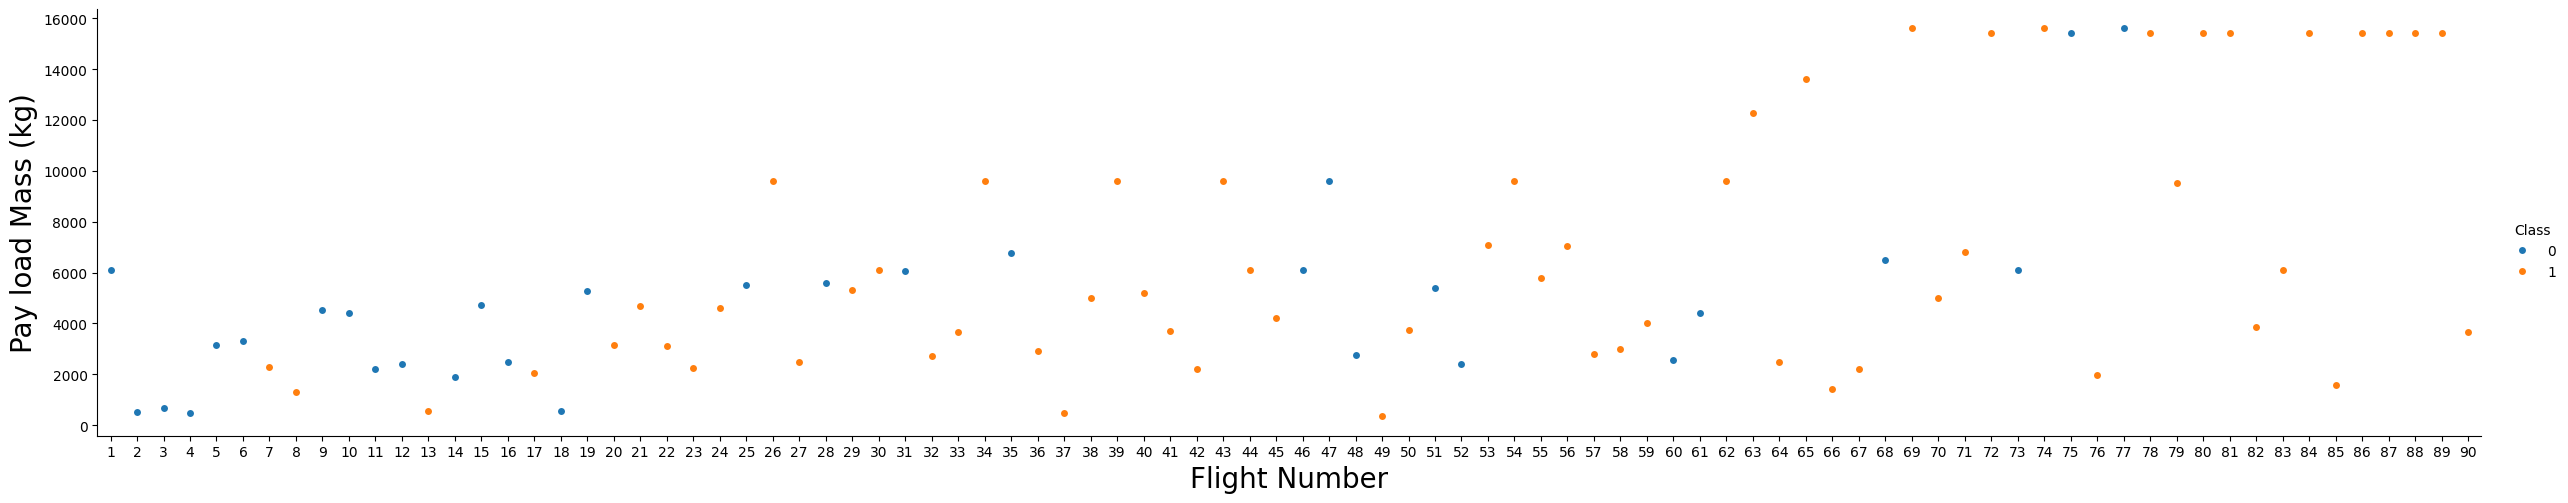

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

TASK 1: Visualize the relationship between Flight Number and Launch Site

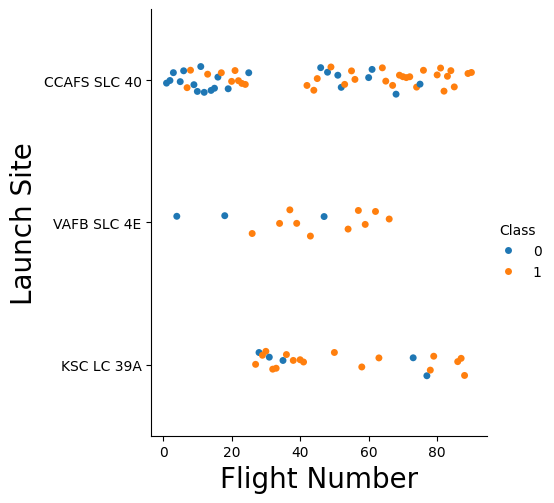

In [ ]:
sns.catplot(y='LaunchSite',x = 'FlightNumber', hue='Class',data= df)
plt.xlabel('Flight Number',fontsize=20)
plt.ylabel('Launch Site',fontsize=20)
plt.show()

##### TASK 2: Visualize the relationship between Payload Mass and Launch Site

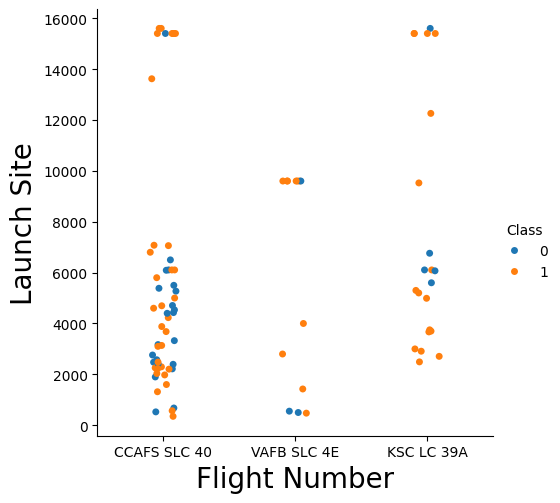

In [ ]:
sns.catplot(y='PayloadMass',x = 'LaunchSite', hue='Class',data= df)
plt.xlabel('Flight Number',fontsize=20)
plt.ylabel('Launch Site',fontsize=20)
plt.show()

TASK 3: Visualize the relationship between success rate of each orbit type

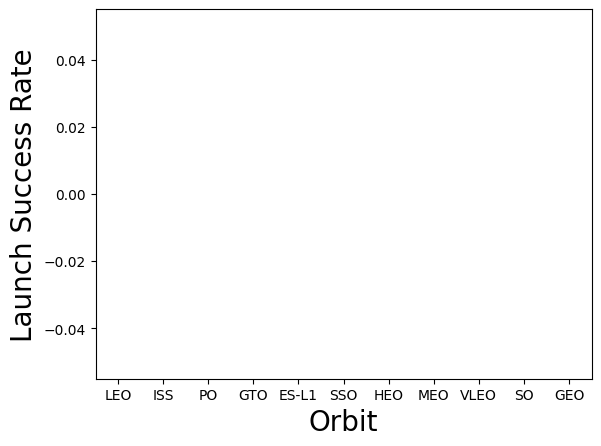

In [ ]:
sns.barplot(x='Orbit',y= df.groupby('Orbit')['Class'].mean(),data = df)
plt.xlabel('Orbit',fontsize=20)
plt.ylabel('Launch Success Rate',fontsize=20)
plt.show()

TASK 4: Visualize the relationship between FlightNumber and Orbit type

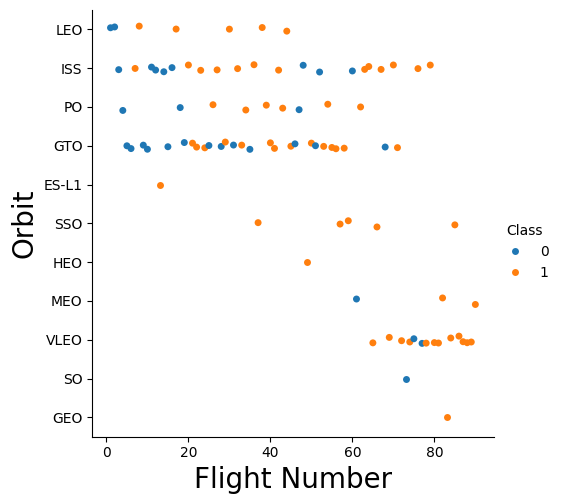

In [ ]:
sns.catplot(y='Orbit',x = 'FlightNumber', hue='Class',data= df)
plt.xlabel('Flight Number',fontsize=20)
plt.ylabel('Orbit',fontsize=20)
plt.show()


TASK 5: Visualize the relationship between Payload Mass and Orbit type

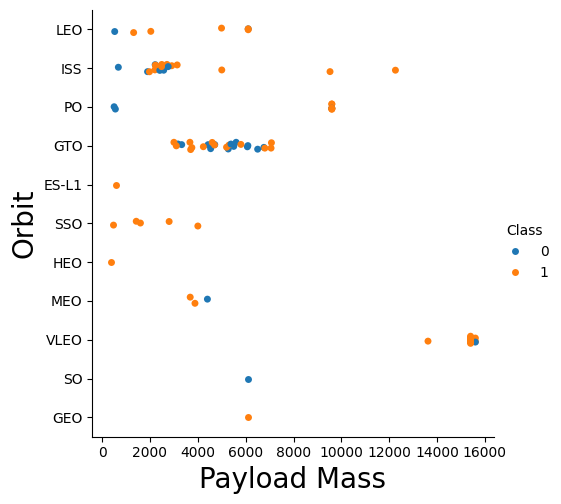

In [ ]:
sns.catplot(y='Orbit',x = 'PayloadMass', hue='Class',data= df)
plt.xlabel('Payload Mass',fontsize=20)
plt.ylabel('Orbit',fontsize=20)
plt.show()








TASK 6: Visualize the launch success yearly trend

In [ ]:
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

print(df['Date'].unique())

['2010' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020']


In [ ]:
yearly_success_rate = df.groupby('Date')['Class'].mean().reset_index()
print(yearly_success_rate)
print(type(yearly_success_rate))

   Date     Class
0  2010  0.000000
1  2012  0.000000
2  2013  0.000000
3  2014  0.333333
4  2015  0.333333
5  2016  0.625000
6  2017  0.833333
7  2018  0.611111
8  2019  0.900000
9  2020  0.842105
<class 'pandas.core.frame.DataFrame'>


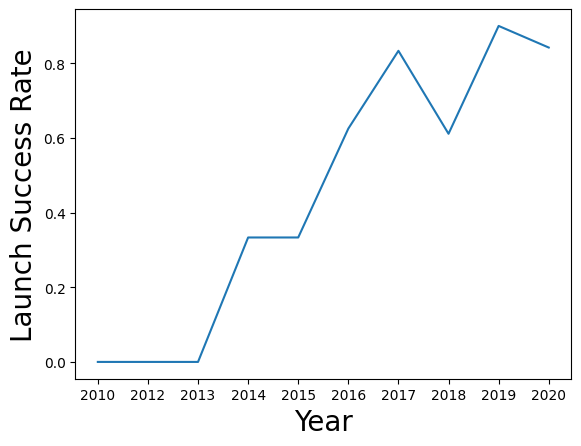

In [ ]:
sns.lineplot(x='Date',y= 'Class',data = yearly_success_rate)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Launch Success Rate',fontsize=20)
plt.show()

TASK : Print all launch sites names

In [ ]:
print(df['LaunchSite'].unique())

['CCAFS SLC 40' 'VAFB SLC 4E' 'KSC LC 39A']


In [ ]:
%load_ext sql

In [ ]:
import sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [ ]:
%sql sqlite:///my_data1.db
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [ ]:
%sql Select distinct Launch_site from SPACEXTBL LIMIT 5;

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


Task
Display 5 records where launch sites begin with the string 'CCA'

In [ ]:

%sql select * from SPACEXTBL where Launch_Site like 'CCA%' limit 5;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


Task 3
Display the total payload mass carried by boosters launched by NASA (CRS)

In [ ]:
%sql select sum(PAYLOAD_MASS__KG_) from SPACEXTBL where customer like '%NASA%(CRS)%';

 * sqlite:///my_data1.db
Done.


sum(PAYLOAD_MASS__KG_)
48213


Task 4
Display average payload mass carried by booster version F9 v1.1

In [ ]:
%sql select sum(PAYLOAD_MASS__KG_) from SPACEXTBL where Booster_Version like '%F9 v1.1%';

 * sqlite:///my_data1.db
Done.


sum(PAYLOAD_MASS__KG_)
38020


Task 5
List the date when the first succesful landing outcome in ground pad was acheived.

In [ ]:
%sql select distinct(Landing_Outcome) from SPACEXTBL;

 * sqlite:///my_data1.db
Done.


Landing_Outcome
Failure (parachute)
No attempt
Uncontrolled (ocean)
Controlled (ocean)
Failure (drone ship)
Precluded (drone ship)
Success (ground pad)
Success (drone ship)
Success
Failure


In [ ]:
%sql select min(Date) from SPACEXTBL where Landing_Outcome like '%Success (ground pad)%';

 * sqlite:///my_data1.db
Done.


min(Date)
2015-12-22


### Task 6

##### List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000

In [ ]:
%sql select Booster_Version from SPACEXTBL where Landing_Outcome like '%Success (drone ship)%' and PAYLOAD_MASS__KG_ between 4000 and 6000;

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


Task 7
List the total number of successful and failure mission outcomes

In [ ]:
%sql select Mission_Outcome, count(Mission_Outcome) from SPACEXTBL group by Mission_Outcome;

 * sqlite:///my_data1.db
Done.


Mission_Outcome,count(Mission_Outcome)
Failure (in flight),1
Success,98
Success,1
Success (payload status unclear),1


Task 8
List all the booster_versions that have carried the maximum payload mass. Use a subquery.

In [ ]:
%sql select Booster_Version from SPACEXTBL where PAYLOAD_MASS__KG_ = (select max(PAYLOAD_MASS__KG_) from SPACEXTBL);

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


Task 9
List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.

In [ ]:
%sql select substr(Date,1,4) as Year , substr(Date,6,2) as month from SPACEXTBL;

 * sqlite:///my_data1.db
Done.


Year,month
2010,06
2010,12
2012,05
2012,10
2013,03
2013,09
2013,12
2014,01
2014,04
2014,07


In [ ]:
%sql select substr(Date, 6, 2) as Month, Landing_Outcome, Booster_Version, Launch_Site from SPACEXTBL where Landing_Outcome like '%Failure (drone ship)%' and substr(Date, 1, 4) = '2015';

 * sqlite:///my_data1.db
Done.


Month,Landing_Outcome,Booster_Version,Launch_Site
01,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
04,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


Task 10
Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.

In [ ]:
%sql select Landing_Outcome, count(Landing_Outcome) as Count from SPACEXTBL where Date between '2010-06-04' and '2017-03-20' group by Landing_Outcome order by Count desc;

 * sqlite:///my_data1.db
Done.


Landing_Outcome,Count
No attempt,10
Success (drone ship),5
Failure (drone ship),5
Success (ground pad),3
Controlled (ocean),3
Uncontrolled (ocean),2
Failure (parachute),2
Precluded (drone ship),1


TASK 7: Create dummy variables to categorical columns

In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [ ]:
features_one_hot = pd.get_dummies(data = features)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
features_one_hot.astype('float64')

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


TASK 8: Cast all numeric columns to float64

In [ ]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)